In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [5]:
# Load the dataset
file_path = "heart.csv"
df = pd.read_csv(file_path)

In [6]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [12]:
# Display first few rows
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [20]:
# Trim column names to remove any leading/trailing spaces
df.columns = df.columns.str.strip()

In [28]:
# Encode categorical variables
df = df.apply(lambda col: LabelEncoder().fit_transform(col) if col.dtypes == 'object' else col)

In [30]:
# Handling missing values (if any)
df = df.dropna()

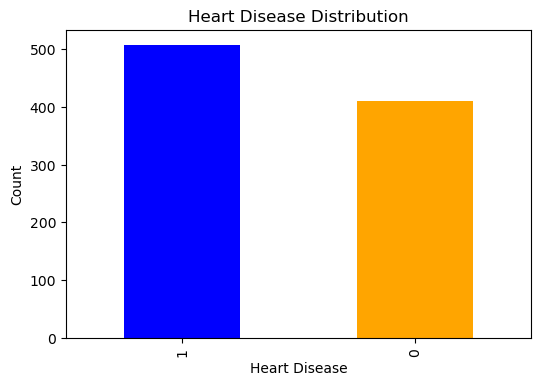

In [32]:
# Visualize Heart Disease Distribution
plt.figure(figsize=(6, 4))
df.iloc[:, -1].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title("Heart Disease Distribution")
plt.xlabel("Heart Disease")
plt.ylabel("Count")
plt.show()

In [34]:
# Define features and target variable
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [36]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

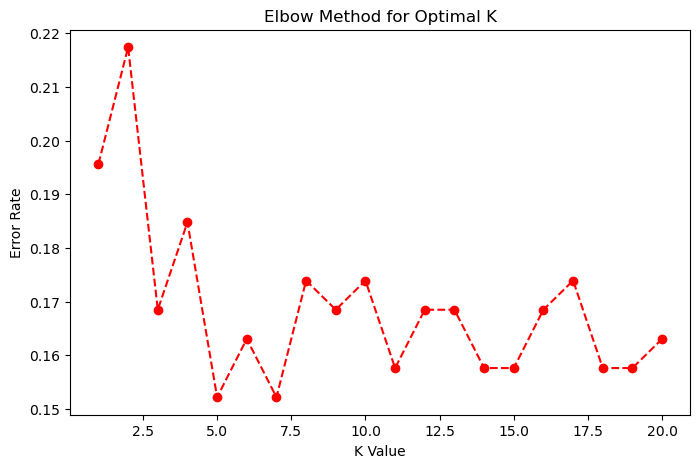

In [40]:
# Find the optimal K value using the elbow method
error_rates = []
k_values = range(1, 21)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    error_rates.append(np.mean(y_pred_k != y_test))

plt.figure(figsize=(8, 5))
plt.plot(k_values, error_rates, marker='o', linestyle='dashed', color='red')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.title('Elbow Method for Optimal K')
plt.show()

In [42]:
# Train KNN model with the optimal K
optimal_k = k_values[np.argmin(error_rates)]
model = KNeighborsClassifier(n_neighbors=optimal_k)
model.fit(X_train, y_train)

KNeighborsClassifier()

In [44]:
# Make predictions
y_pred = model.predict(X_test)

In [46]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [48]:
print("\nModel Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Model Accuracy: 0.8478260869565217

Confusion Matrix:
 [[68  9]
 [19 88]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.88      0.83        77
           1       0.91      0.82      0.86       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



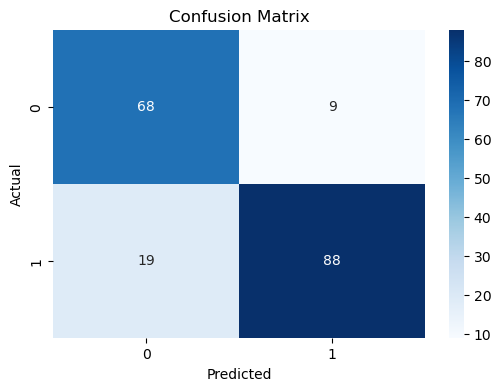

In [50]:
# Plot confusion matrix after predictions
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

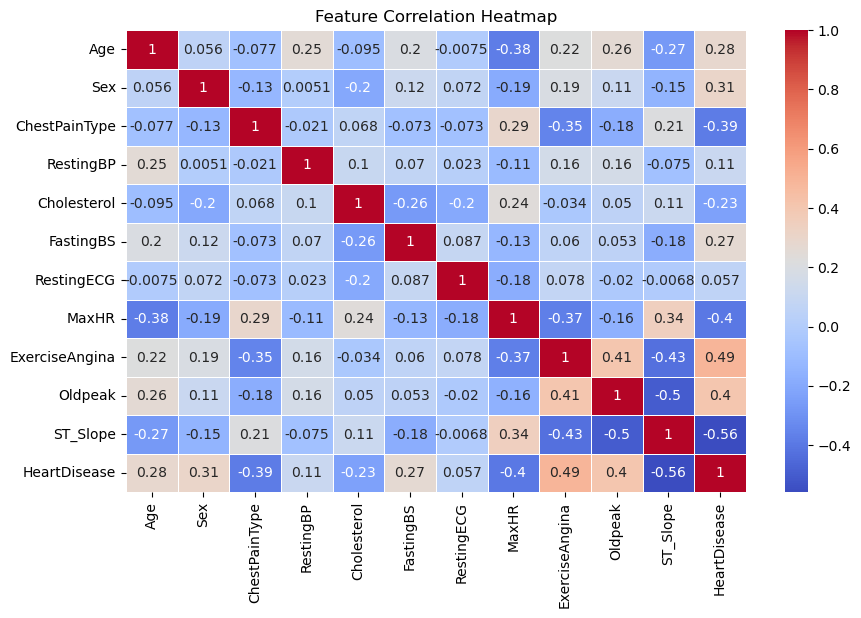

In [52]:
# Visualize feature correlation
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()